In [37]:
import pymolzilla.processing as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', size=8) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=8) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend

## Zpracovani

In [38]:
f1 = pm.cofe_room_t()
f2 = pm.cofe_low_t()
f1.df.drop(7, inplace=True)
f1.load()
f1.preprocess()
f1.process()
f2.load()
f2.preprocess()
f2.process()

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8
loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8


In [39]:
print('room T')
f1.analyze()
print('low T')
f2.analyze()

room T
analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
postprocessing
low T
analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
postprocessing


## Kreslení

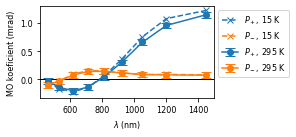

In [42]:
fig, ax = plt.subplots(figsize=(4,1.8),constrained_layout=True)

ax.errorbar(f1.df['wavelength'], f1.df['Pp'], 0.05, color='C0', marker='o', label=r'$P_+$, 295 K', capsize=5)
ax.errorbar(f1.df['wavelength'], f1.df['Pm'], 0.05, color='C1', marker='o', label=r'$P_-$, 295 K', capsize=5)
ax.plot(f2.df['wavelength'], f2.df['Pp'], color='C0', linestyle='dashed', marker='x', label=r'$P_+$, 15 K')
ax.plot(f2.df['wavelength'], f2.df['Pm'], color='C1', linestyle='dashed', marker='x', label=r'$P_-$, 15 K')

ax.axhline(y=0, color='black', linewidth=1)

ax.set_xlabel(r'$\lambda$ (nm)')
ax.set_ylabel(r'MO koeficient (mrad)')

ax.legend(bbox_to_anchor=(1,1))

fig.savefig('out/cofe-pmld.pdf')

## Chyby

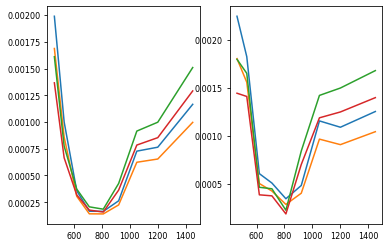

In [6]:
def f(i,j):
    return (f1 if j==1 else f2).df['dPij'].apply(lambda x: x[i])

fig, (ax1, ax2) = plt.subplots(1,2)
for i in range(4):
    ax1.plot(f1.df['wavelength'], f(i,1))
    ax2.plot(f2.df['wavelength'], f(i,2))

In [ ]:
f1[5].

In [7]:
print(f1.df['Pip'])
print(f1.df['Pim'])
print(f2.df['Pip'])
print(f2.df['Pim'])

0    0.985503
1   -2.555382
2   -3.407904
3   -0.387837
4   -2.169107
5   -1.175580
6   -1.110316
8   -1.084515
9   -0.991825
Name: Pip, dtype: float64
0    -0.741755
1     8.231092
2   -10.145272
3    -5.003904
4    -4.962952
5    -4.771645
6    -4.575834
8    -4.399739
9    -4.208149
Name: Pim, dtype: float64
0   -5.808895
1   -2.898715
2   -3.790007
3   -0.759617
4   -0.059749
5   -1.036573
6   -0.945596
7   -0.920291
8   -0.921945
Name: Pip, dtype: float64
0    1.537127
1   -2.680308
2   -6.212180
3   -3.053439
4   -2.612014
5   -3.181486
6   -2.387645
7   -2.033306
8   -1.607404
Name: Pim, dtype: float64
